Integrante: Jordy Alexander Franco Rosado

----
Sexto A

Objetivo del proyecto

Analizar el sentimiento de reseñas de películas, clasificándolas como positivas o negativas.

Por tanto:

El texto es la información principal.

El sentimiento es la variable objetivo.

Fuente del dataset
--
El dataset utilizado en este proyecto fue obtenido de la plataforma Kaggle, una fuente reconocida por proveer conjuntos de datos reales para análisis de datos y aprendizaje automático.


Variables relevantes

Para este proyecto, se seleccionan:

review_es
Texto de la reseña en español (entrada del modelo).

sentimiento
Etiqueta de clase (positivo / negativo) → variable objetivo.




In [102]:
# Procesamiento y visualización
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Limpieza de texto
import re
import unicodedata

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Vectorización de texto
from sklearn.feature_extraction.text import TfidfVectorizer

# Modelo de clasificación supervisada
from sklearn.linear_model import LogisticRegression

# Evaluación del modelo
from sklearn.metrics import accuracy_score, classification_report

from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

from nltk.corpus import stopwords

In [103]:
# Cargar dataset
import pandas as pd

df = pd.read_csv(
    'IMDB Dataset SPANISH.csv',
    sep=',',
    encoding='latin-1',
    engine='python',
    quotechar='"',
    index_col=0,
    on_bad_lines='skip'
)

df


,review_en,review_es,sentiment,sentimiento;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
ï»¿,,,,
85,This was probably the worst movie i have ever ...,ÃÂ¡Esta fue probablemente la peor pelÃÂ­cula...,negative,negativo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
112,It's terrific when a funny movie doesn't make ...,Es fantÃÂ¡stico cuando una pelÃÂ­cula divert...,negative,negativo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
236,This game ranks above all so far. I had the ho...,Este juego se ubica arriba hasta ahora.Tuve el...,positive,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
275,I love to watch this movie a lot because of al...,I love to watch this movie a lot because of al...,positive,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
10040,This greatest movie gives us clue to the depth...,Esta mayor pelÃÂ­cula nos da pista a la profu...,positive,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
...,...,...,...,...
21984,I would just like to say that The Cure was a f...,Solo me gustarÃÂ­a decir que la cura fue una ...,positive,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
22137,People love the original story for its ending....,La gente ama la historia original por su final...,negative,negativo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
22174,No likeable characters (the lead is a combinat...,No hay personajes simpÃÂ¡ticos (el liderazgo ...,negative,negativo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...


Variables irrelevantes o descartadas

Se descartan las siguientes columnas:

review_en
No se utiliza porque el análisis se enfoca en español.

sentiment
Etiqueta en inglés, redundante con sentimiento.

sentimiento;;;;;;;;;;;;;;;;;;;;;
Columna dañada por el formato del CSV (ruido).

In [104]:
# Normalización del nombre de la columna (estructura)
df = df.rename(columns={
    'sentimiento;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;': 'sentimiento'
})

Seleccion de variables relevantes
despues de renombrar la columna seleccionamos las dos variables

In [105]:
# Selección de variables relevantes
df= df[['review_es', 'sentimiento']]
df.head()

,review_es,sentimiento
ï»¿,,
85,ÃÂ¡Esta fue probablemente la peor pelÃÂ­cula...,negativo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
112,Es fantÃÂ¡stico cuando una pelÃÂ­cula divert...,negativo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
236,Este juego se ubica arriba hasta ahora.Tuve el...,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
275,I love to watch this movie a lot because of al...,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...
10040,Esta mayor pelÃÂ­cula nos da pista a la profu...,positivo;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;...


Procesamiento
En esta etapa sí se modifican los valores, con el objetivo de:

eliminar ruido

dejar los datos listos para análisis y modelado


In [106]:
# Limpieza de la variable objetivo
df['sentimiento'] = (
    df['sentimiento']
    .str.replace(';', '', regex=False)
    .str.strip()
)

df['sentimiento'].value_counts()

,count
sentimiento,
positivo,151
negativo,109


Limpieza del texto en la variable review_es

In [107]:
# Pasar a minúsculas
df['review_es'] = df['review_es'].str.lower()

In [108]:
# Eliminar enlaces
df['review_es'] = df['review_es'].apply(
    lambda x: re.sub(r'http\S+|www\S+', '', x)
)

In [109]:
# Eliminar números
df['review_es'] = df['review_es'].apply(
    lambda x: re.sub(r'\d+', '', x)
)

In [110]:
# Eliminar caracteres especiales (manteniendo letras y acentos)
df['review_es'] = df['review_es'].apply(
    lambda x: re.sub(r'[^a-záéíóúñü\s]', '', x)
)

In [111]:
# Eliminar espacios repetidos
df['review_es'] = df['review_es'].apply(
    lambda x: re.sub(r'\s+', ' ', x).strip()
)

In [112]:
df.head()

,review_es,sentimiento
ï»¿,,
85,esta fue probablemente la peor pelcula que he ...,negativo
112,es fantstico cuando una pelcula divertida no t...,negativo
236,este juego se ubica arriba hasta ahoratuve el ...,positivo
275,i love to watch this movie a lot because of al...,positivo
10040,esta mayor pelcula nos da pista a la profundid...,positivo


Manejo de valores nulos
Aquí el objetivo es verificar y tratar valores faltantes en las variables que estamos usando:

review_es

sentimiento

In [113]:
#Deteccion de valores nulos
df.isnull().sum()

,0
review_es,0
sentimiento,0


No existen valores nulos en ninguna de las variables seleccionadas.



Se omite el tratamiento de outliers, ya que el conjunto de datos es textual y no contiene variables numéricas susceptibles a valores atípicos.

##Transformación

La normalización y estandarización no se aplicaron debido a que el conjunto de datos está compuesto por información textual y no contiene variables numéricas que requieran este tipo de transformación.

Codificación de variables categóricas

Decisión

positivo : 1

negativo : 0

In [114]:
# Codificación de la variable objetivo
df['sentimiento'] = df['sentimiento'].map({
    'positivo': 1,
    'negativo': 0
})

df['sentimiento'].value_counts()

,count
sentimiento,
1,151
0,109


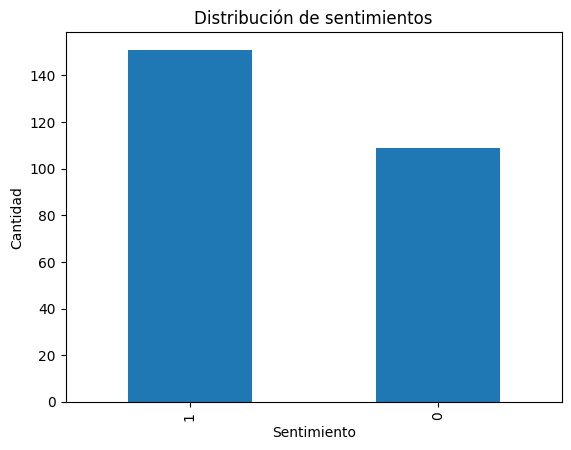

In [115]:
df['sentimiento'].value_counts().plot(kind='bar')
plt.title('Distribución de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
plt.show()

Stopwords

In [116]:
stop_words_es = stopwords.words('spanish')
len(stop_words_es), stop_words_es[:10]

(313, ['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se'])

Extracción de características

se usa TF-IDF

In [117]:
X = df['review_es']
y = df['sentimiento']

vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words=stop_words_es
)

X_tfidf = vectorizer.fit_transform(X)

X_tfidf.shape

(260, 3222)

In [118]:
vectorizer.get_feature_names_out()[:20]


array(['abbey', 'abc', 'able', 'about', 'abraham', 'abrirse', 'absence',
       'absolutamente', 'absolutely', 'absoluto', 'absolutopero',
       'absorbenteel', 'absurd', 'absurdose', 'abuela', 'aburrida',
       'aburrido', 'aburrimiento', 'abused', 'acaba'], dtype=object)

Se incorporó la eliminación de stopwords en español para reducir ruido en el texto y mejorar la representación de características. Para ello, se utilizó una lista de stopwords en español y se integró directamente en la vectorización TF-IDF.

#Mineria

Para la fase de minería de datos se seleccionó el algoritmo de Regresión Logística, debido a que es un método de clasificación supervisada ampliamente utilizado en tareas de análisis de sentimientos. Este algoritmo se adapta adecuadamente a representaciones vectoriales del texto como TF-IDF y permite una interpretación clara de los resultados.

##Entrenamiento del modelo
Usamos un split estándar 80/20

In [119]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Crear y entrenar el modelo (Regresión Logística)

In [120]:
model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',
    random_state=42
)

model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Evaluación del modelo

In [121]:
y_pred = model.predict(X_test)


Métricas de evaluación

Accuracy y reporte de clasificación

In [122]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(classification_report(y_test, y_pred))

Accuracy: 0.9230769230769231
              precision    recall  f1-score   support

           0       0.95      0.86      0.90        22
           1       0.91      0.97      0.94        30

    accuracy                           0.92        52
   macro avg       0.93      0.92      0.92        52
weighted avg       0.92      0.92      0.92        52



Matriz de confusión

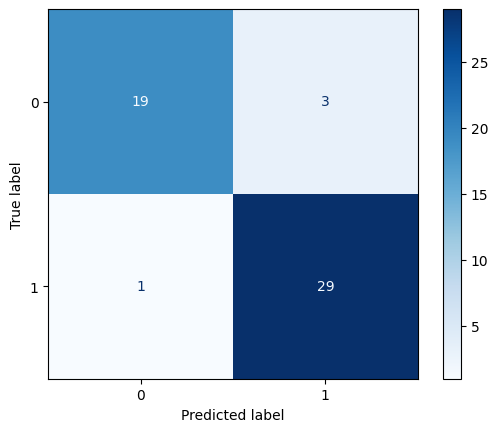

In [123]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    cmap='Blues'
)

plt.show()

conclusion
---
En este proyecto se aplicaron las fases del proceso KDD para desarrollar un sistema de análisis de sentimientos a partir de reseñas de películas en español. A través de la limpieza de texto, la transformación con TF-IDF y el uso de un modelo de regresión logística, se logró clasificar las reseñas como positivas o negativas de forma adecuada.

Los resultados obtenidos muestran que el modelo funciona correctamente, aunque en textos ambiguos presenta probabilidades cercanas entre clases, lo cual es esperado debido al tamaño del dataset y al uso de técnicas tradicionales de procesamiento de texto. Finalmente, la integración del modelo en una interfaz permitió comprobar su funcionamiento de manera interactiva y práctica.


## Guardado del modelo y vectorizador

Una vez entrenado y evaluado el modelo de análisis de sentimientos, se procedió a guardar tanto el modelo entrenado como el vectorizador TF-IDF utilizando la librería pickle. Esto permite reutilizar el modelo sin necesidad de entrenarlo nuevamente, facilitando su posterior integración en una aplicación externa o una interfaz gráfica. Se la utilizo para el frontend

In [136]:
import pickle

# Guardar modelo
with open("sentiment_model.pkl", "wb") as f:
    pickle.dump(model, f)

# Guardar vectorizador
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)


En esta parte se realizó una prueba del modelo utilizando un texto ingresado manualmente por el usuario. El texto fue transformado con el mismo vectorizador TF-IDF usado en el entrenamiento y posteriormente evaluado por el modelo para obtener el sentimiento predicho junto con las probabilidades asociadas a cada clase. Para la decisión final se aplicó un umbral, considerando como positivo solo aquellos casos con una probabilidad mayor o igual al 60%.

In [137]:
# Ingresar texto
texto_nuevo = input("Escribe una reseña: ")

# Vectorizar el texto (IMPORTANTE: va en lista)
X_nuevo = vectorizer.transform([texto_nuevo])

# Predicción
pred = model.predict(X_nuevo)
proba = model.predict_proba(X_nuevo)

# Mostrar resultados
print("\nResultado de la predicción:")
print("Probabilidad negativa:", proba[0][0])
print("Probabilidad positiva:", proba[0][1])

# Interpretación final
if proba[0][1] >= 0.6:
    print("Sentimiento: POSITIVO ")
else:
    print("Sentimiento: NEGATIVO ")



Escribe una reseña: La película es lenta y triste, pero tiene algunos momentos interesantes.

Resultado de la predicción:
Probabilidad negativa: 0.4281955526661365
Probabilidad positiva: 0.5718044473338635
Sentimiento: NEGATIVO 


dataset : https://www.kaggle.com/code/robertocarlosmendoza/preprocessing-movie-reviews-spanish/input